<a href="https://colab.research.google.com/github/chinmacreates/Python/blob/main/Life_expectancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
#=============================================================================
#                       PUBLIC HEALTH DATA ANALYTICS
#                LIFE EXPECTANCY EXPLORATORY DATA ANALYSIS
#=============================================================================

import kagglehub

# Download latest version
path = kagglehub.dataset_download("kumarajarshi/life-expectancy-who")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/life-expectancy-who


In [22]:
#Installs packages
!pip install pandas numpy matplotlib seaborn jupyter

In [23]:
# Load dataset
#Import os module
import os
print(os.listdir(path)) #Returns list of files and directories

['Life Expectancy Data.csv']


In [24]:
#Import libraries
import pandas as pd
import os

#Loading data
os.chdir(path)
df = pd.read_csv('Life Expectancy Data.csv') #Read data from CSV
print(df.head()) #displays first few rows of the dat frame

       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.

In [25]:
#Initial exploration
print("Dataset Shape:", df.shape)

Dataset Shape: (2938, 22)


In [26]:
print(df.isnull().sum()) #check for missing values

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


In [27]:
#Data Cleaning

#Rename columns for readabilty
df.rename(columns={'Life expectancy ': 'LifeExpectancy'}, inplace=True)

#Missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]

#Filling missing numerical values with mean
df.fillna(df.mean(numeric_only=True), inplace=True)

In [28]:
#Descriptive Analysis
print(df.describe())
print(df.info())

              Year  LifeExpectancy  Adult Mortality  infant deaths  \
count  2938.000000     2938.000000      2938.000000    2938.000000   
mean   2007.518720       69.224932       164.796448      30.303948   
std       4.613841        9.507640       124.080302     117.926501   
min    2000.000000       36.300000         1.000000       0.000000   
25%    2004.000000       63.200000        74.000000       0.000000   
50%    2008.000000       72.000000       144.000000       3.000000   
75%    2012.000000       75.600000       227.000000      22.000000   
max    2015.000000       89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2938.000000             2938.000000  2938.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       3.916288             1987.914858    22.586855   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   

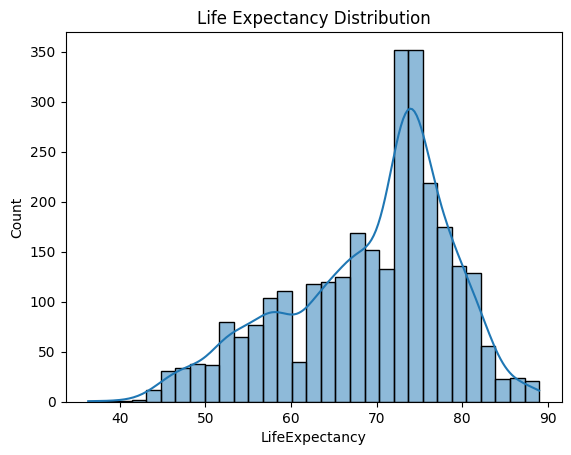

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

#Distribution of Life Expectancy
sns.histplot(df['LifeExpectancy'], kde=True) #Histogram plot using Kernel Density Estimation
plt.title('Life Expectancy Distribution')
plt.show() #displays the created plot

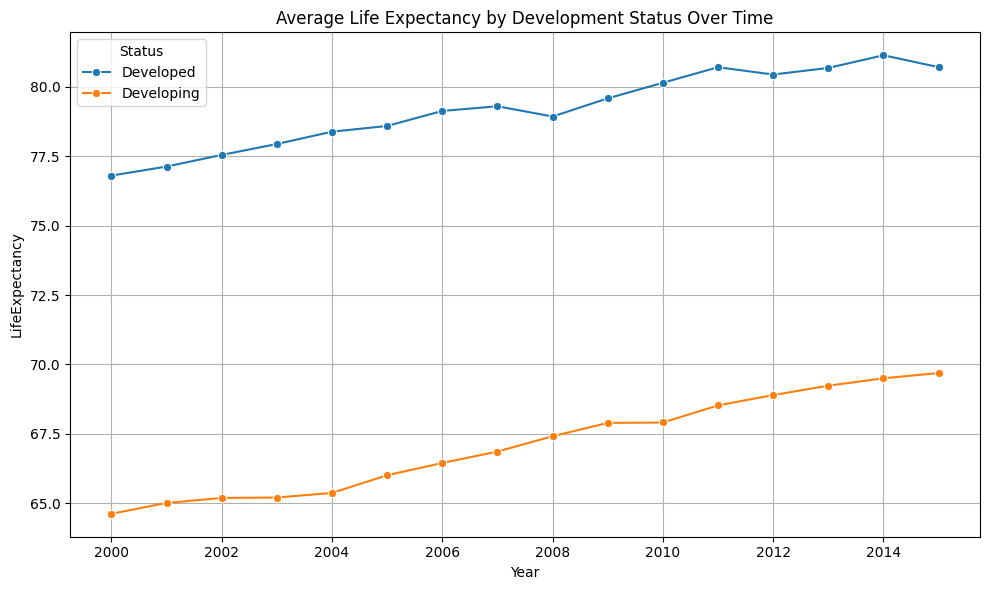

In [30]:
#Trends Over Time by Status

# Group by Year and Status
df_grouped = df.groupby(['Year', 'Status'])['LifeExpectancy'].mean().reset_index() #mean by year and status

# Plot
plt.figure(figsize=(10,6))
sns.lineplot(data=df_grouped, x='Year', y='LifeExpectancy', hue='Status', marker='o')

plt.title('Average Life Expectancy by Development Status Over Time')
plt.xlabel('Year')
plt.ylabel('LifeExpectancy')
plt.grid(True)
plt.legend(title='Status')
plt.tight_layout()
plt.show()

In [31]:
#Life expectancy is clustered around 70 years which is a Normal Distribution and indicates good health
#Disparity between Developing and Developed countries
#Improvement in Life Expectancy across the years